In [1]:
import pandas as pd
import numpy as np

In [3]:
import requests

In [4]:
import zipfile

In [6]:
import re
import urllib.request
from bs4 import BeautifulSoup

# Task 1

# 1

In [7]:
r = requests.get("https://drive.google.com/uc?export= download&id=0B6ZlG_Eygdj-c1kzcmUxN05VUXM", stream=True)

In [8]:
with open('./zipfile.zip', 'wb') as file:
        file.write(r.content)

In [9]:
zf = zipfile.ZipFile('./zipfile.zip')
files = zf.namelist()
print(files)

['DeveloperSurvey2017QuestionaireCleaned.pdf', '__MACOSX/', '__MACOSX/._DeveloperSurvey2017QuestionaireCleaned.pdf', 'README_2017.txt', '__MACOSX/._README_2017.txt', 'survey_results_public.csv', 'survey_results_schema.csv']


In [10]:
schema = pd.read_csv(zf.open(files[-1]), index_col='Column')
data = pd.read_csv(zf.open(files[-2]), index_col = 'Respondent')

In [11]:
data.iloc[:, :1].head()

,Professional
Respondent,
1,Student
2,Student
3,Professional developer
4,Professional non-developer who sometimes write...
5,Professional developer


In [12]:
schema.head()

,Question
Column,
Respondent,Respondent ID number
Professional,Which of the following best describes you?
ProgramHobby,Do you program as a hobby or contribute to ope...
Country,In which country do you currently live?
University,"Are you currently enrolled in a formal, degree..."


In [13]:
data.shape[0]

51392

In [14]:
schema.shape[0]

154

# 2

In [15]:
from mpl_toolkits.basemap import Basemap

In [16]:
import matplotlib.pyplot as plt

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1704: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1707: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


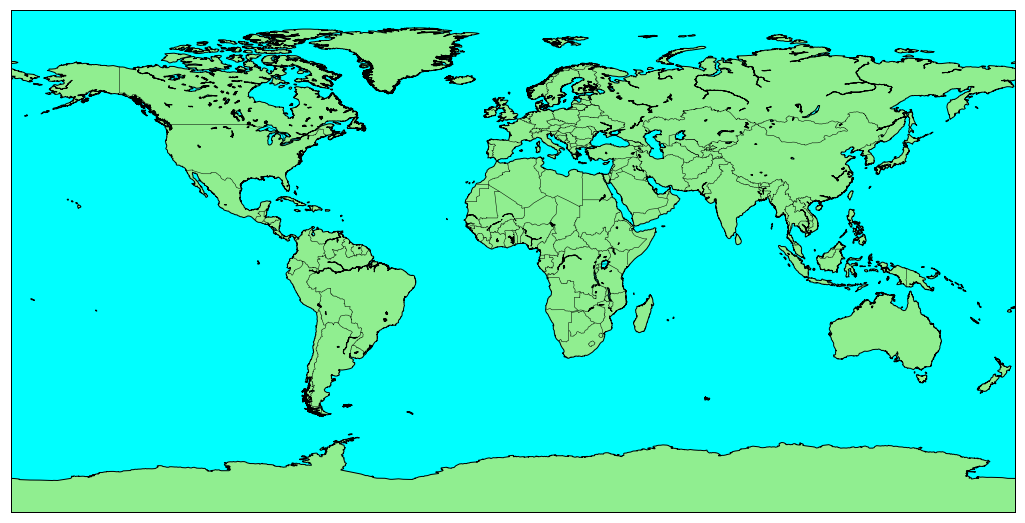

In [22]:
plt.figure(figsize = (18, 18));
map = Basemap(resolution='l')
map.drawcoastlines()
map.drawcountries()
map.drawmapboundary(fill_color = 'aqua')
map.fillcontinents(color = 'lightgreen')
plt.savefig('1-2.svg', bbox_inches='tight', dpi = 600);

In [23]:
plt.show();

# 3

In [27]:
url = 'https://developers.google.com/public-data/docs/canonical/countries_csv'
html = urllib.request.urlopen(url).read()

In [28]:
soup = BeautifulSoup(html, 'html.parser')

In [29]:
coords = []
table = soup.find('table')
rows = table.find_all('tr')
a = []
for ele in rows[0].find_all('th'):
    a.append(ele.text)
coords.append(a)
for row in rows[1:]:
    a = []
    for ele in row.find_all('td'):
        a.append(ele.text)
    coords.append(a)

In [30]:
countries = pd.DataFrame(coords[1:], columns = coords[0])
countries.drop(countries.index[226], inplace = True)

In [31]:
lons = countries['longitude'].apply(float).values
lats = countries['latitude'].apply(float).values
x, y = map(lons, lats)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1704: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1707: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


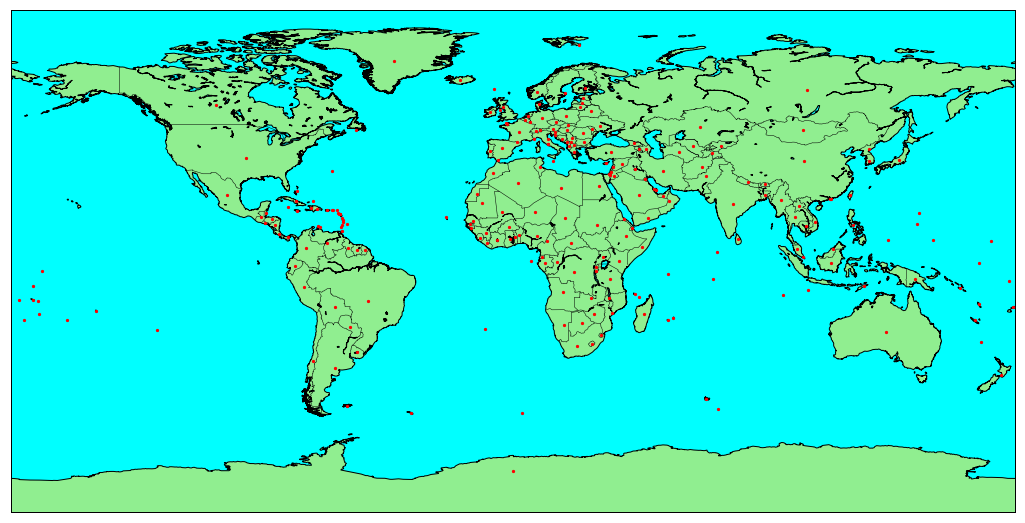

In [32]:
plt.figure(figsize = (18, 18));
map = Basemap(resolution='l')
map.drawcoastlines()
map.drawcountries()
map.drawmapboundary(fill_color = 'aqua')
map.fillcontinents(color = 'lightgreen')
map.scatter(x, y, s = 5, latlon = True, zorder = 10, color = 'red')
plt.savefig('1-3.svg', bbox_inches='tight', dpi = 600);

In [33]:
plt.show()

# 4

In [34]:
coun_dict = \
{'Bosnia-Herzegovina': 'Bosnia and Herzegovina',
'Azerbaidjan': 'Azerbaijan',
'Brunei Darussalam': 'Brunei',
'Falkland Islands': 'Falkland Islands [Islas Malvinas]',
'Heard and McDonald Islands': 'Heard Island and McDonald Islands',
'Slovak Republic': 'Slovakia',
'Tadjikistan': 'Tajikistan',
'Vatican City State': 'Vatican City',
'Virgin Islands (British)': 'British Virgin Islands',
'Virgin Islands (USA)': 'U.S. Virgin Islands',
'Russian Federation': 'Russia',
'Polynesia (French)': 'French Polynesia',
'Pitcairn Island': 'Pitcairn Islands',
'Saint Vincent & Grenadines': 'Saint Vincent and the Grenadines',
'Reunion (French)': 'Réunion',
'Ivory Coast (Cote D\'Ivoire)': 'Côte d\'Ivoire',
'Zaire': 'Congo [DRC]',
'Macedonia': 'Macedonia [FYROM]',
'Martinique (French)': 'Martinique',
'Myanmar': 'Myanmar [Burma]',
'New Caledonia (French)': 'New Caledonia',
'S. Georgia & S. Sandwich Isls.':
'South Georgia and the South Sandwich Islands',
'Moldavia': 'Moldova',
'French Guyana': 'French Guiana',
}

In [35]:
a = ((data.groupby(['Country']).size())).sort_values(ascending = False)

In [36]:
a.rename(coun_dict, inplace = True)

In [37]:
a.name = 'name'

In [38]:
countries = countries.set_index('name').join(a, how = 'left')

In [39]:
countries.fillna(0, inplace = True)

In [40]:
countries['name'] = (countries['name'])**(0.5)*2

In [41]:
s = countries['name'].values

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1704: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1707: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


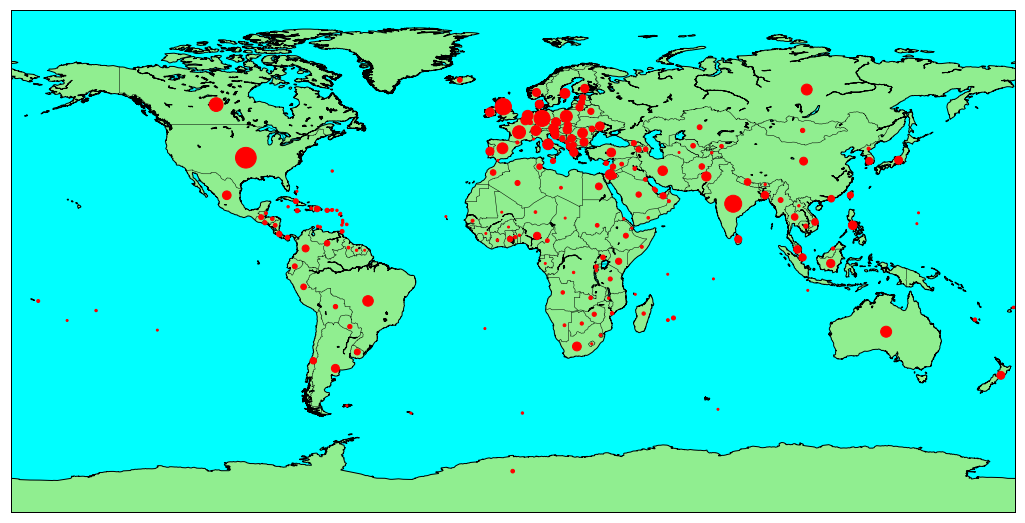

In [46]:
plt.figure(figsize = (18, 18));
map = Basemap(resolution='l')
map.drawcoastlines()
map.drawcountries()
map.drawmapboundary(fill_color = 'aqua')
map.fillcontinents(color = 'lightgreen')
map.scatter(x, y, s = s*2, latlon = True, zorder = 100, color = 'red')
plt.savefig('1-4.svg', bbox_inches='tight', dpi = 600);

In [47]:
plt.show()

---

# Task 2

# 1

In [48]:
import seaborn as sns

In [49]:
railways = pd.read_csv('railways201208.csv')
stations = pd.read_csv('stations.csv')

In [50]:
stations.head()

,stshortname,stname,stcode,stdate1,stdate2,stroadname,stroadcode,stcountry,stcountrycode
0,ВЫБОРГ-ПЕРЕВ,ВЫБОРГ-ПЕРЕВАЛКА,2340,18.09.2000,01.01.3000,ОКТЯБРЬСКАЯ,1,Российская Федерация,643
1,КАЛАШНИКОВО,КАЛАШНИКОВО,6230,01.08.2000,01.01.3000,ОКТЯБРЬСКАЯ,1,Российская Федерация,643
2,ДОБЫВАЛОВО,ДОБЫВАЛОВО,5510,01.08.2000,01.01.3000,ОКТЯБРЬСКАЯ,1,Российская Федерация,643
3,СРЕДНЕРОГАТС,СРЕДНЕРОГАТСКАЯ,3490,16.10.2000,01.01.3000,ОКТЯБРЬСКАЯ,1,Российская Федерация,643
4,ЛЕВАШОВО,ЛЕВАШОВО,3880,01.08.2000,01.01.3000,ОКТЯБРЬСКАЯ,1,Российская Федерация,643


In [51]:
railways.tail()

,date_priem,fr_code,sto_code,stn_code,dist,weight,amount,taxsum,commodity
257501,21.08.2012,75813,21400,1540,2157,56340,125022.0,22503.9610,10
257502,02.08.2012,75813,21400,1540,2157,54700,120636.0,21714.4800,10
257503,30.08.2012,75813,21400,1540,2157,57340,127216.0,22898.8810,10
257504,17.08.2012,75809,95470,26470,7508,3000,22035.1,3966.3201,10
257505,17.08.2012,75813,21400,1540,2157,58100,129409.0,23293.6190,10


In [52]:
railways['commodity'] = railways['commodity'].replace(1, 'Coal')
railways['commodity'] = railways['commodity'].replace(2, 'Oil')
railways['commodity'] = railways['commodity'].replace(3, 'Ores')
railways['commodity'] = railways['commodity'].replace(4, 'Metals')
railways['commodity'] = railways['commodity'].replace(5, 'Wood')
railways['commodity'] = railways['commodity'].replace(6, 'Constructions')
railways['commodity'] = railways['commodity'].replace(7, 'Fert.')
railways['commodity'] = railways['commodity'].replace(8, 'Grains')
railways['commodity'] = railways['commodity'].replace(9, 'Petrol')
railways['commodity'] = railways['commodity'].replace(10, 'Other')

# 2

In [53]:
plt.rcParams['font.family'] = 'Times New Roman'

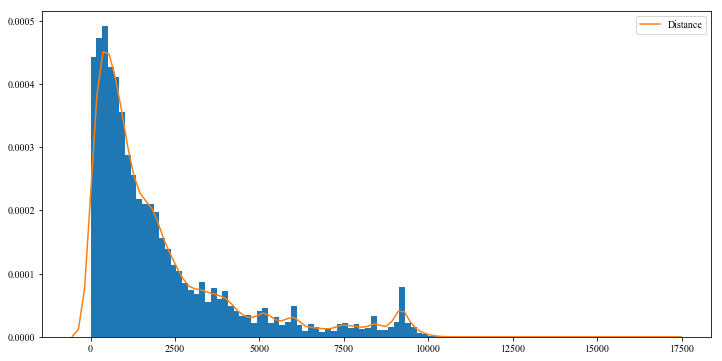

In [54]:
plt.figure(figsize = (12,6)) 
plt.hist(railways['dist'], bins = 100, normed=True) 
sns.kdeplot(railways['dist'])
plt.legend(['Distance']);
plt.savefig('2-2.svg', bbox_inches='tight', dpi = 600);
plt.show()

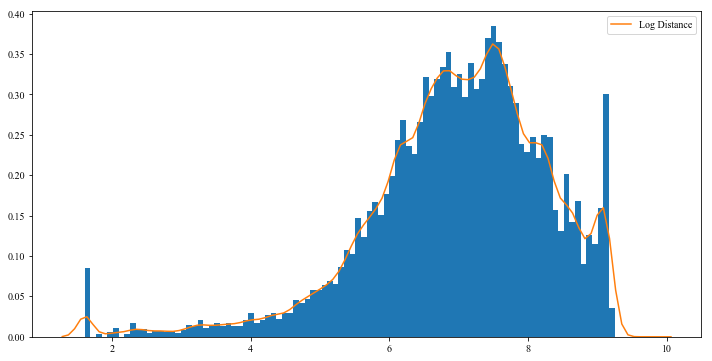

In [55]:
plt.figure(figsize = (12,6)) 
plt.hist(np.log(railways['dist']), bins = 100, normed=True) 
sns.kdeplot(np.log(railways['dist']))
plt.legend(['Log Distance']);
plt.savefig('2-2-1.svg', bbox_inches='tight', dpi = 600);
plt.show()

# 3

In [56]:
a = railways[['dist', 'commodity', 'weight']]
a['dist'] = np.log(a['dist'])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


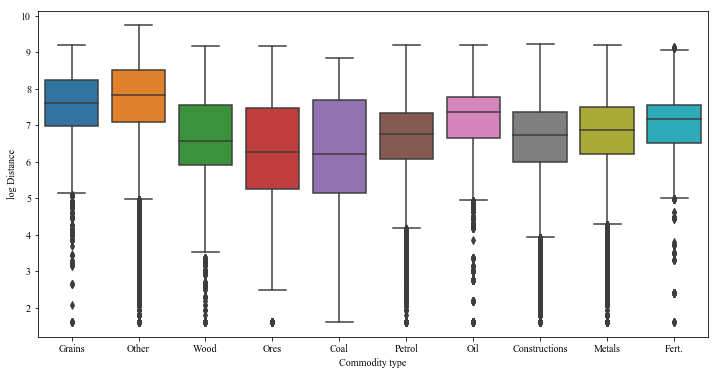

In [57]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'commodity', y = 'dist', data = a)
plt.xlabel('Commodity type') 
plt.ylabel('log Distance')
plt.savefig('2-3.svg', bbox_inches='tight', dpi = 600);
plt.show()

# 4

In [58]:
medians = ((railways.groupby(['commodity']).median()))

In [59]:
b = a.merge(medians.reset_index()[['commodity', 'weight']], on = 'commodity')

In [60]:
b['Weight'] = b['weight_x'] > b['weight_y']

In [61]:
b['Weight'] = b['Weight'].replace(False, 'Light')

In [62]:
b['Weight'] = b['Weight'].replace(True, 'Heavy')

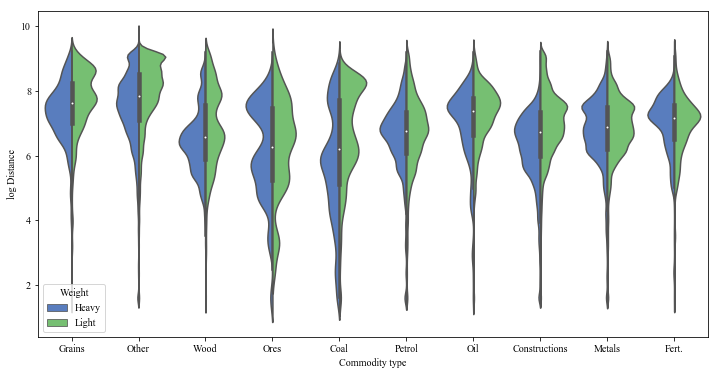

In [63]:
plt.figure(figsize = (12,6))
sns.violinplot(x = 'commodity', y = 'dist', data = b, hue = 'Weight', split = True, palette='muted')
plt.xlabel('Commodity type') 
plt.ylabel('log Distance')
plt.savefig('2-4.svg', bbox_inches='tight', dpi = 600);
plt.show()

# 5

In [64]:
scplt = railways

In [65]:
scplt['x'] = np.log(scplt['weight'] * scplt['dist'])
scplt['y'] = np.log(scplt['amount'])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [66]:
scplt.head()

,date_priem,fr_code,sto_code,stn_code,dist,weight,amount,taxsum,commodity,x,y
0,31.08.2012,1100,61400,3010,1944,202150,139005.0,25020.9000,Grains,19.789268,11.842265
1,01.08.2012,1100,61360,59250,431,265500,66608.0,11989.4400,Grains,18.555478,11.106580
2,29.08.2012,1100,81530,60530,1443,134700,74336.0,13380.4800,Grains,19.085285,11.216351
3,03.08.2012,1100,62630,1030,2150,67500,51431.0,9257.5801,Grains,18.793106,10.847996
4,02.08.2012,1100,62710,53850,1402,579150,326169.0,58710.4220,Grains,20.514972,12.695171


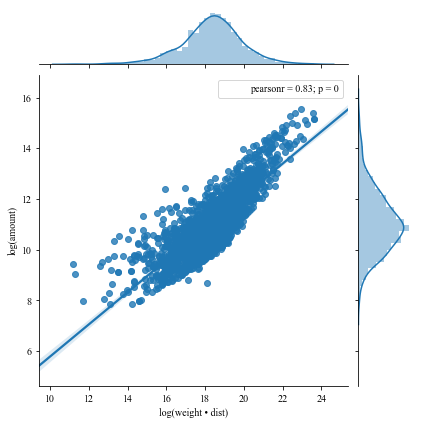

In [67]:
plt.figure(figsize = (12,8))
sns.jointplot(x = 'x', y = 'y', data = scplt.sample(2000), kind = 'reg')
plt.xlabel('log(weight • dist)') 
plt.ylabel('log(amount)')
plt.savefig('2-5.svg', bbox_inches='tight', dpi = 600);
plt.show()

In [68]:
scplt_nums = scplt[(scplt.amount > 0)]

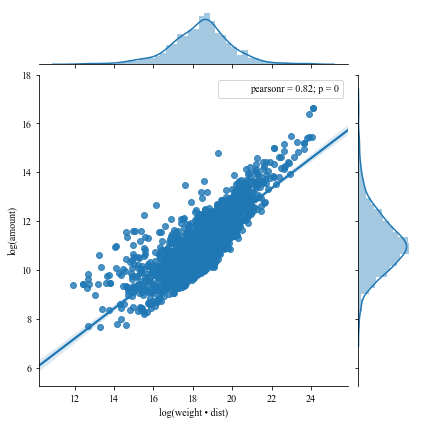

In [69]:
plt.figure(figsize = (12,8))
sns.jointplot(x = 'x', y = 'y', data = scplt_nums.sample(2000), kind = 'reg')
plt.xlabel('log(weight • dist)') 
plt.ylabel('log(amount)')
plt.savefig('2-5-1.svg', bbox_inches='tight', dpi = 600);
plt.show()